Import all the libraries you require in the cell below.

Saving CommuteStLouis.csv to CommuteStLouis.csv
          City  Age  Distance  Time Sex
0    St. Louis   52        10    20   M
1    St. Louis   21        35    40   F
2    St. Louis   23        40    45   F
3    St. Louis   38         0     2   M
4    St. Louis   26        15    25   M
..         ...  ...       ...   ...  ..
495  St. Louis   49        10    15   F
496  St. Louis   57         2     5   F
497  St. Louis   35         0     5   F
498  St. Louis   32        10    30   M
499  St. Louis   35         8    10   F

[500 rows x 5 columns]


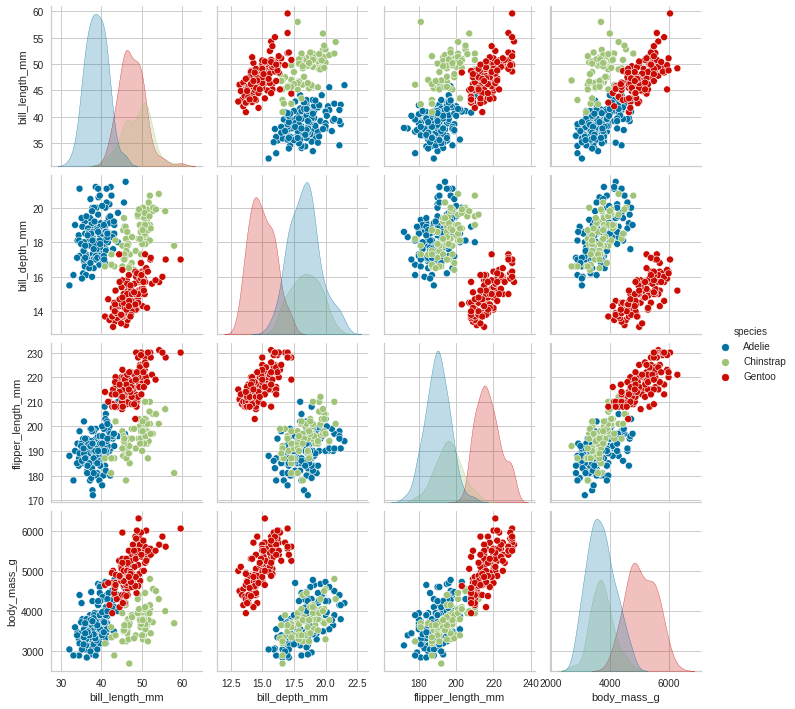

In [ ]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('CommuteStLouis.csv')
print(df)

### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

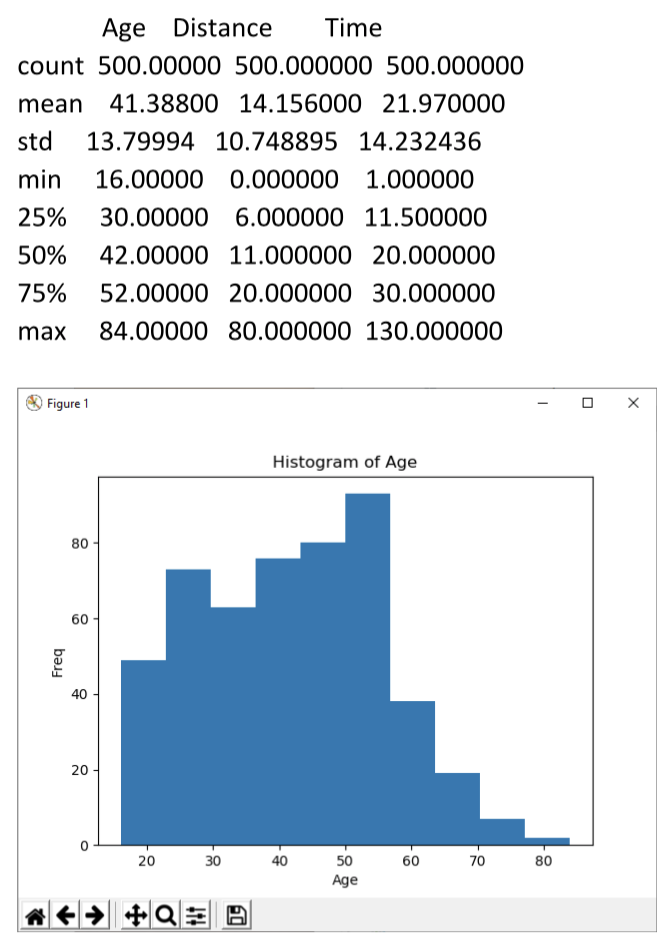

In [ ]:
df.describe() #statistical summary of the data

,Age,Distance,Time
count,500.00000,500.000000,500.000000
mean,41.38800,14.156000,21.970000
std,13.79994,10.748895,14.232436
min,16.00000,0.000000,1.000000
25%,30.00000,6.000000,11.500000
50%,42.00000,11.000000,20.000000
75%,52.00000,20.000000,30.000000
max,84.00000,80.000000,130.000000


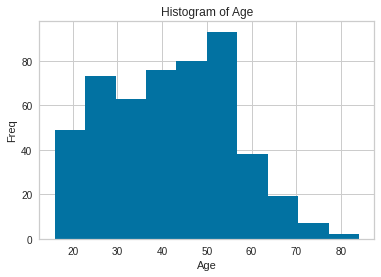

In [ ]:
plt.hist(df.Age)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

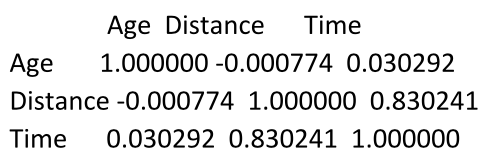

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

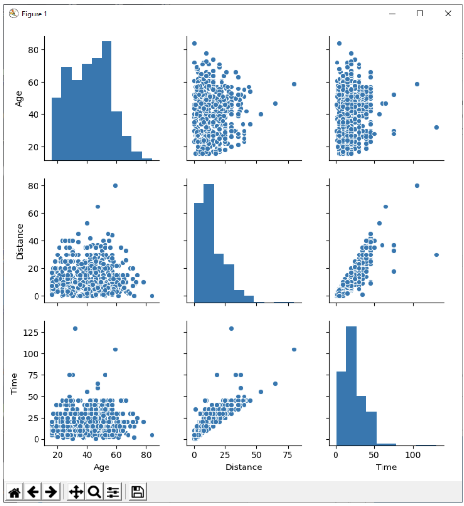

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

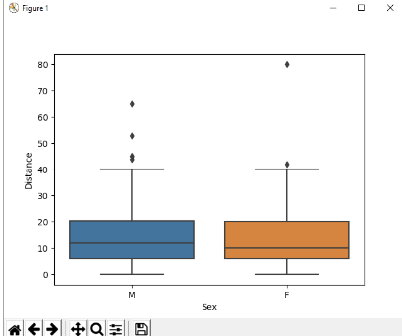

In [ ]:
# a
df.corr() #correlation matrix of age, distance and time

,Age,Distance,Time
Age,1.000000,-0.000774,0.030292
Distance,-0.000774,1.000000,0.830241
Time,0.030292,0.830241,1.000000


# PartA

Time and Distance are highly correlated 

the correlation coefficient is 0.865

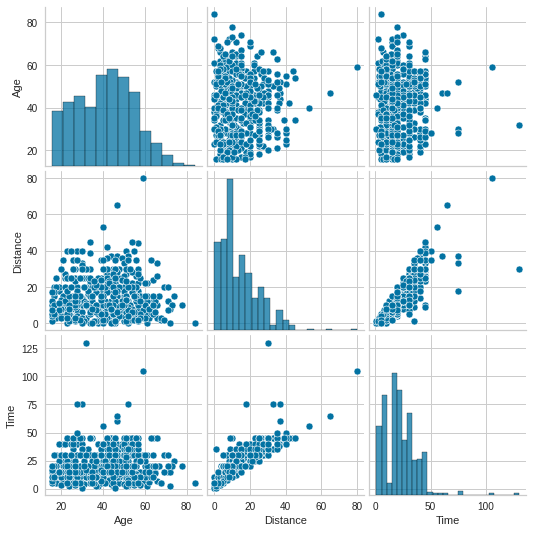

In [ ]:
# b
sns.pairplot(df)
# What do the figures in the diagonal going from the top left to the bottom right show? 
# What can you say about the skewness of the various attributes?


# Part B

The figures show the correlation of  variables where the main diagonal shows that each variable correlates with itself- so represents histograms.

It seems like the various attributes are mainly right skewed like age and distance. Time seems to be right skewed too but not as much as other variables. 

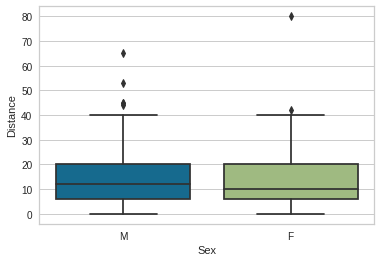

In [ ]:
sns.boxplot(x=df.Sex, y=df.Distance, data=df)

# Part C:

the data in the file does indicate that women tend to commute shorter distances because the median distance travelled for females is a little lower than the median distance travelled for men. 

In fact, the difference between the median values is very small.

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

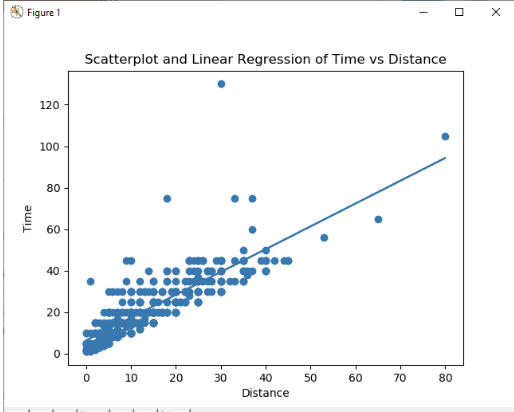

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


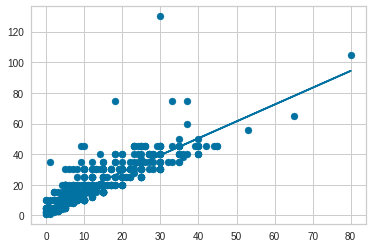

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

model = LinearRegression()
x = df.Distance
X = x[:, np.newaxis]
y = df.Time
model.fit(X, y)

y_predicted = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.show()

x = df.Time.values
X = x.reshape(-1, 1)
y = df.Time


### 4. Show the distribution of residuals of the data from Part 3.

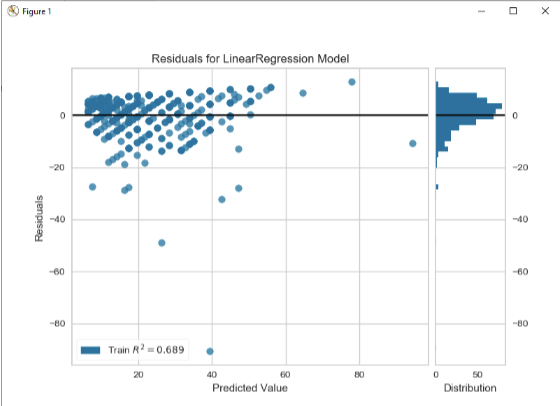

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


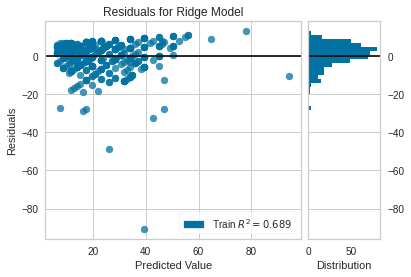

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

model = LinearRegression(fit_intercept=True)
x = df.Distance
X = x[:, np.newaxis]
y = df.Time
model.fit(X, y)

# Instantiate the linear model and the visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)
visualizer.fit(X, y)
visualizer.poof()
